In [1]:
import pandas as pd 
df = pd.read_csv("Abalone_data(1).csv", sep=',')
df = pd.get_dummies(df, columns=['Sex'])

In [2]:
import numpy as np 
np.random.seed(42) 
#Splitting dataset in train and test using 70/30 method 
indexes = np.random.choice(len(df),np.int(len(df)*0.7),replace=False)
df_train = df.loc[indexes]
df_test = df.loc[~(df.index.isin(indexes))]

#Question 1 

The assumptions made before state that: 
- For all $1\leqslant i\leqslant n$, :   $Age_i = \beta_0$ + $\beta_1 Height_i$ + $\epsilon_i$ 
- $\beta_1>0$ as a larger height is associated with an older age.
- For all $1\leqslant i\leqslant n$, $\mathrm{E}$($\epsilon_i$) = 0 
- For all $1\leqslant i\leqslant n$, $\mathrm{V}$($\epsilon_i$) = $\sigma^2$ with $\sigma$ > 0
- For all $1\leqslant i\leqslant n$, For all $1\leqslant j\leqslant n$ with $i$ $\neq$ $j$ $Cov$($\epsilon_i$, $\epsilon_j$) = 0
- For all $1\leqslant i\leqslant n$, $\epsilon_i$ $\sim \mathcal{N}(0,\,\sigma^{2})$

To test these hypotheses, we will perform the test $H_0 : \beta_0 = 0 $ vs  $H_1 : \beta_0 \neq 0 $

In [3]:
#Question 2

import matplotlib.pyplot as plt 

row_names = ["count", "mean", "std", "min", "25%", "50%", "75%", "max", "variance", "interquantile Range"]

Describe_df = df.describe()
Variance_df = pd.DataFrame(data = df.var())
IQR_df = pd.DataFrame(data = df.quantile(0.75) - df.quantile(0.25))
Describe_df = pd.concat([Describe_df, Variance_df.T, IQR_df.T])
Describe_df.index = row_names
Describe_df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000
mean,104.801724,81.578305,27.905412,165.763506,71.879957,36.122534,47.770426,9.932471,0.312979,0.321360,0.365661
std,24.020509,19.849906,8.365278,98.084710,44.395943,21.924091,27.842510,3.223601,0.463761,0.467055,0.481673
min,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000,1.000000,0.000000,0.000000,0.000000
25%,90.000000,70.000000,23.000000,88.300000,37.200000,18.675000,26.000000,8.000000,0.000000,0.000000,0.000000
50%,109.000000,85.000000,28.000000,159.950000,67.200000,34.200000,46.800000,9.000000,0.000000,0.000000,0.000000
75%,123.000000,96.000000,33.000000,230.650000,100.400000,50.600000,65.800000,11.000000,1.000000,1.000000,1.000000
max,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000,29.000000,1.000000,1.000000,1.000000
variance,576.984869,394.018777,69.977877,9620.610251,1970.999744,480.665760,775.205360,10.391606,0.215075,0.218140,0.232009
interquantile Range,33.000000,26.000000,10.000000,142.350000,63.200000,31.925000,39.800000,3.000000,1.000000,1.000000,1.000000


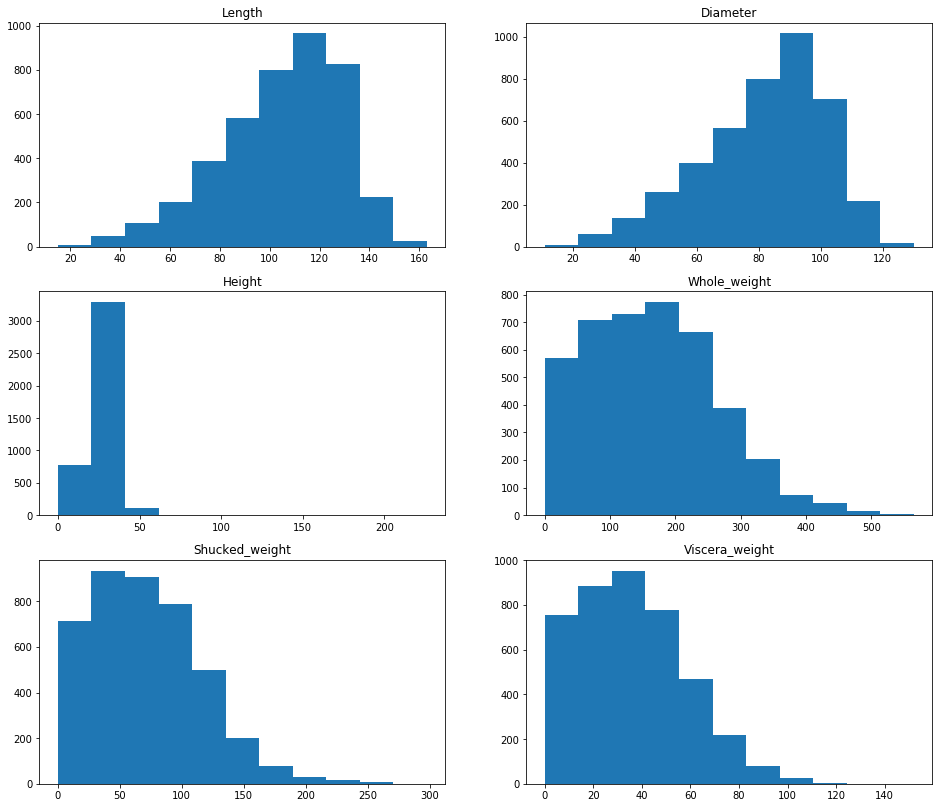

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (16, 14))

for col, ax in zip(df.columns, axes.flatten()):
    ax.hist(df[col], bins=11)
    ax.set_title(col)

There seem to be an itersting trend between the variables Rings, Length and all height variables


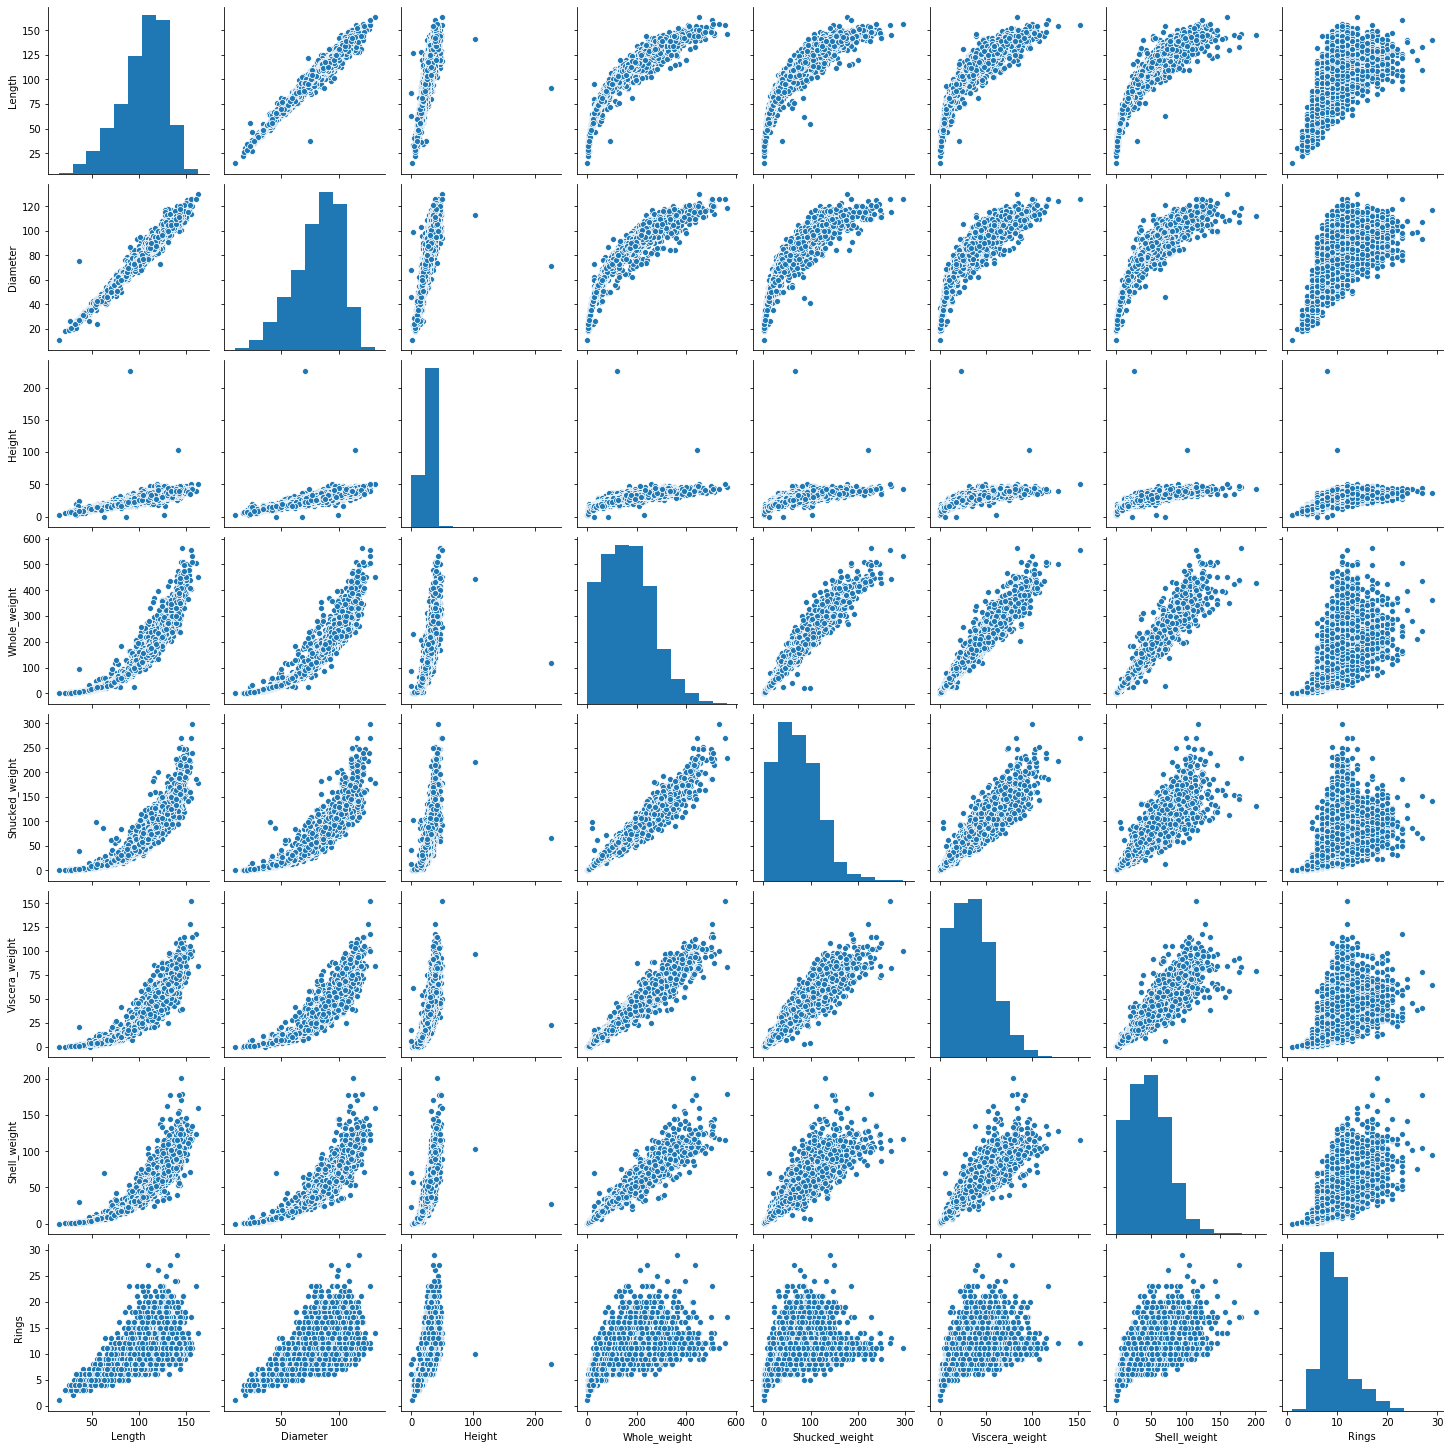

In [5]:
#Question 3

import seaborn as sns
sns.pairplot(df.iloc[:, 0:8]);

print("There seem to be an itersting trend between the variables Rings, Length and all height variables")

'Biologists seem to be globaly right because Age increases with Height. Nevertheless, this correlation does not seem exhaustive'

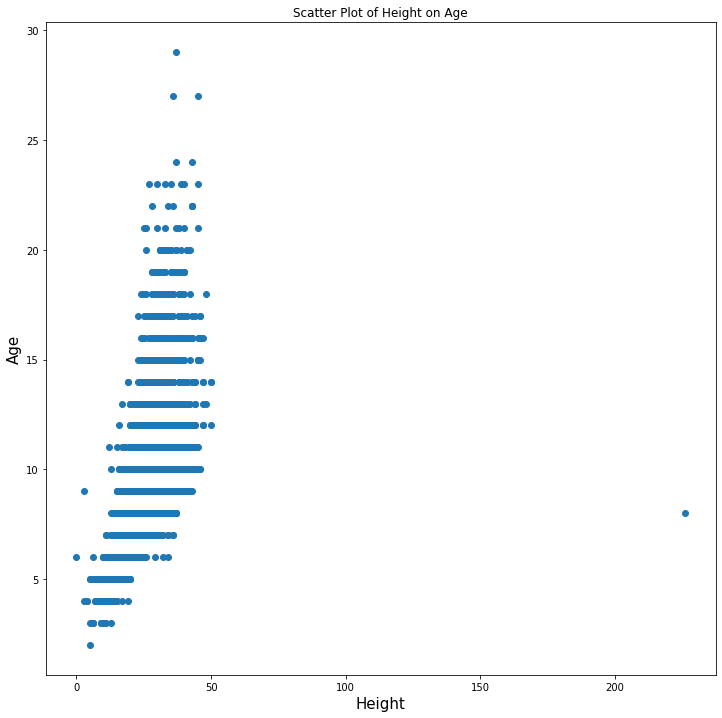

In [6]:
Height = np.array(df_train.iloc[:, 2]).reshape(-1, 1)
Age = np.array(df_train.iloc[:, 7])

plt.figure(figsize=(12, 12))
Scatter = plt.scatter(Height, Age)

plt.ylabel("Age", fontsize = 15)
plt.xlabel("Height", fontsize = 15)
plt.title("Scatter Plot of Height on Age"); 

"""Biologists seem to be globaly right because Age increases with Height. Nevertheless, this correlation does not seem exhaustive"""

In [7]:
#Question 4

from sklearn.linear_model import LinearRegression

Height = np.array(df_train.iloc[:, 2]).reshape(-1, 1)
Age = np.array(df_train.iloc[:, 7])

model = LinearRegression()
model.fit(Height, Age)

print("""The intercept of the model is {:.3f}, the coefficient is {:.3f} and the score is {:.3f}. 
So the result is not as correlated as the Biologist hypothese could suppose""".format(model.intercept_, float(model.coef_), model.score(Height, Age)))

The intercept of the model is 4.155, the coefficient is 0.208 and the score is 0.297. 
So the result is not as correlated as the Biologist hypothese could suppose


Even if the line seems to have globaly the same trend as the scatterplot, it does not fit perfectly and outliers are very important


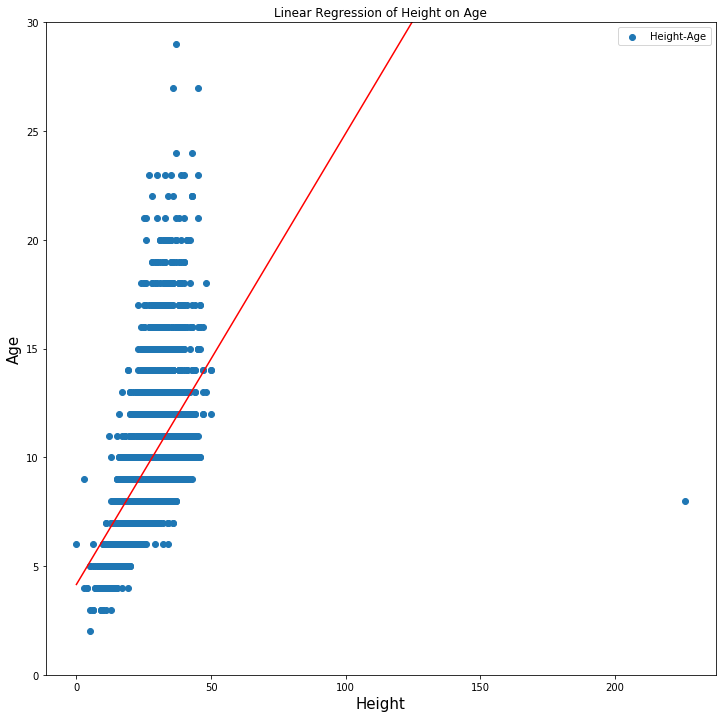

In [8]:
#Question 5

import warnings
warnings.filterwarnings("ignore")

x = np.linspace(0, 200)

plt.figure(figsize=(12, 12))
Scatter = plt.scatter(Height, Age)
Line = plt.plot(x, model.intercept_ + model.coef_ * x, color = "red", label = "Regression Line")
plt.ylabel("Age", fontsize = 15)
plt.ylim(0, 30)
plt.xlabel("Height", fontsize = 15)
plt.title("Linear Regression of Height on Age")
plt.legend((Scatter, Line), ("Height-Age", "Regression Line"));

print("Even if the line seems to have globaly the same trend as the scatterplot, it does not fit perfectly and outliers are very important")

Finally, postulates [P1-P3] are not validated


                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     1232.
Date:                Sun, 08 Nov 2020   Prob (F-statistic):          1.47e-225
Time:                        11:59:17   Log-Likelihood:                -7080.2
No. Observations:                2923   AIC:                         1.416e+04
Df Residuals:                    2921   BIC:                         1.418e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Inte

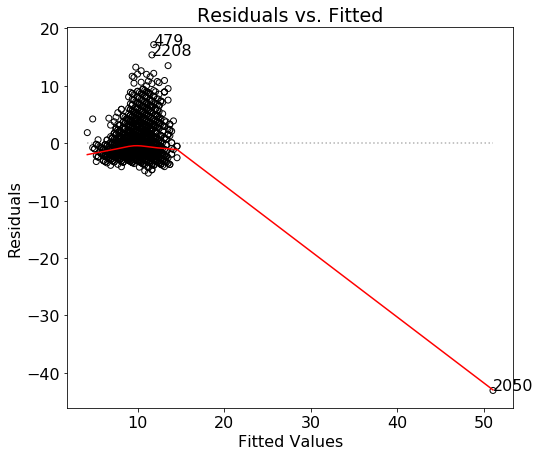

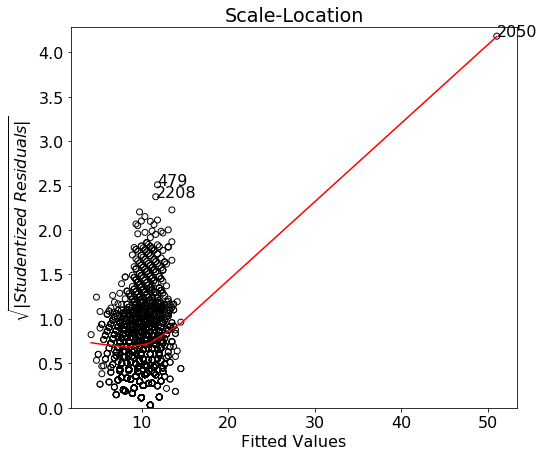

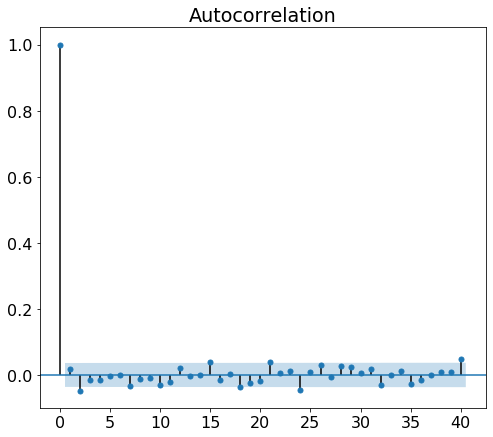

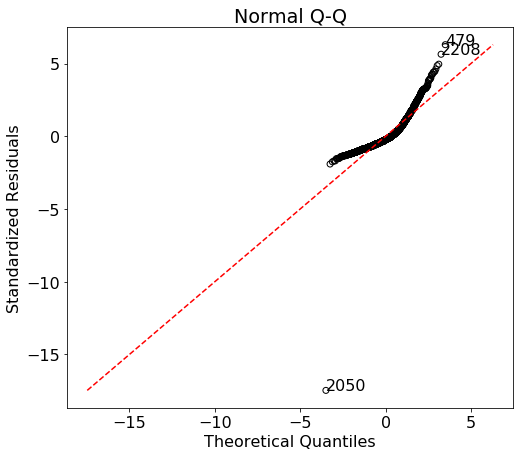

In [9]:
#Question 6

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats

print("Finally, postulates [P1-P3] are not validated")
print("\n")

model = smf.ols(formula='Rings ~ Height', data=df_train)
results = model.fit()
print(results.summary())

residuals = results.resid
fitted = results.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

student_residuals = results.get_influence().resid_studentized_internal
sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
sqrt_student_residuals.index = results.resid.index
smoothed = lowess(sqrt_student_residuals,fitted)
top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

fig, ax = plt.subplots()
ax.scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')
ax.set_ylim(0,max(sqrt_student_residuals)+0.1)
for i in top3.index:
    ax.annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
plt.show()

sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
sorted_student_residuals.index = results.resid.index
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

sm.graphics.tsa.plot_acf(residuals, lags=40)

fig, ax = plt.subplots()
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()

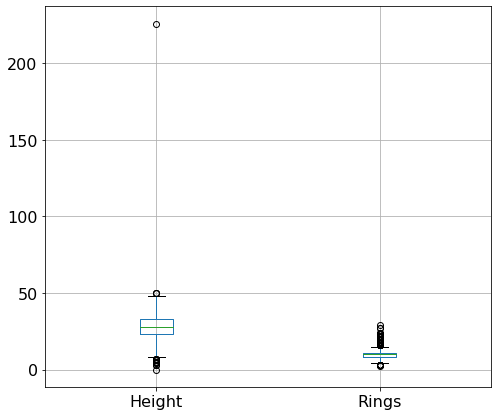

In [10]:
#As we can see below, there are a lot of outliers in the two variables Height and Rings 

boxplot = df_train.boxplot(column=["Height", "Rings"])

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     2495.
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:59:19   Log-Likelihood:                 684.34
No. Observations:                2696   AIC:                            -1365.
Df Residuals:                    2694   BIC:                            -1353.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1778      0.041      4.350      0.0

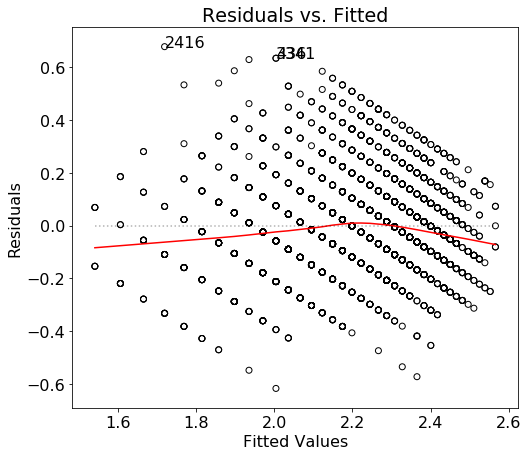

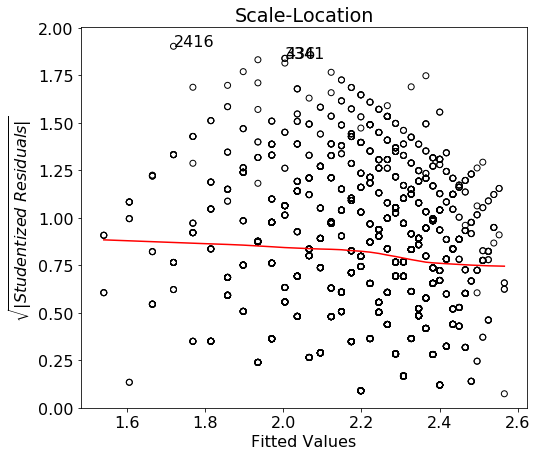

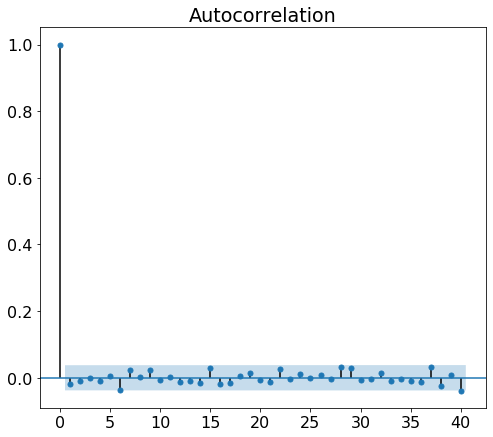

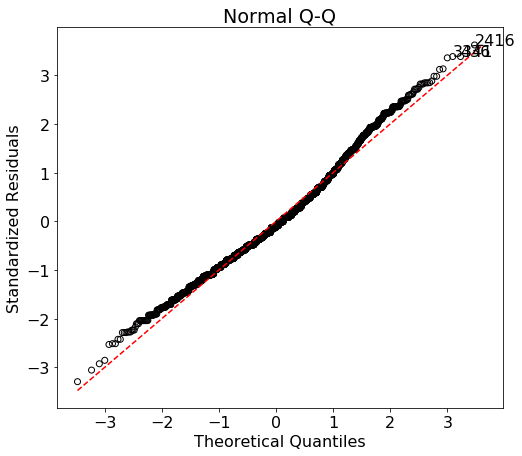

In [11]:
#Thus, we decide to remove all outliers (values below Q1 - 1.5 * IQR and above Q3 + 1.5 * IQR)
#We apply the regression on the logarithm of the result 

from scipy.stats import iqr

df_train_2 = df_train.iloc[:, [2, 7]]

min_limit = df_train_2.quantile(0.25) - 1.5 * (df_train_2.quantile(0.75) - df_train_2.quantile(0.25))
max_limit = df_train_2.quantile(0.75) + 1.5 * (df_train_2.quantile(0.75) - df_train_2.quantile(0.25))

df_train_2 = df_train_2[(df_train_2.iloc[:, 0] > min_limit[0]) & (df_train_2.iloc[:, 0] < max_limit[0]) & (df_train_2.iloc[:, 1] > min_limit[1]) & (df_train_2.iloc[:, 1] < max_limit[1])]

model = smf.ols(formula='Rings ~ Height', data=((np.log(df_train_2))))
results = model.fit()
print(results.summary())

residuals = results.resid
fitted = results.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

student_residuals = results.get_influence().resid_studentized_internal
sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
sqrt_student_residuals.index = results.resid.index
smoothed = lowess(sqrt_student_residuals,fitted)
top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

fig, ax = plt.subplots()
ax.scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')
ax.set_ylim(0,max(sqrt_student_residuals)+0.1)
for i in top3.index:
    ax.annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
plt.show()

sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
sorted_student_residuals.index = results.resid.index
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

sm.graphics.tsa.plot_acf(residuals, lags=40)

fig, ax = plt.subplots()
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()

In [12]:
#Question 7 

""""The output of the model is a value for Beta0 of 0.1778 (with 95% confidence interval of [0.098, 0.258]) and a 
value for Beta1 of 0.6203 (with 95% confidence interval of [0.596, 0.645]). In the context of the exercise, this means
that 1cm more is 0.6203 years more"""

'"The output of the model is a value for Beta0 of 0.1778 (with 95% confidence interval of [0.098, 0.258]) and a \nvalue for Beta1 of 0.6203 (with 95% confidence interval of [0.596, 0.645]). In the context of the exercise, this means\nthat 1cm more is 0.6203 years more'

In [13]:
#Question 8 

"""The R2 of the model is 0.481. This means that 48.1 % of the the age is explained by the Height. Thus, there is 
a statistically significant relationship"""

'The R2 of the model is 0.481. This means that 48.1 % of the the age is explained by the Height. Thus, there is \na statistically significant relationship'

Part II Multiple linear regression, ANOVA, ANCOVA

There seem to be an itersting trend between the variables Rings, Length and all height variables


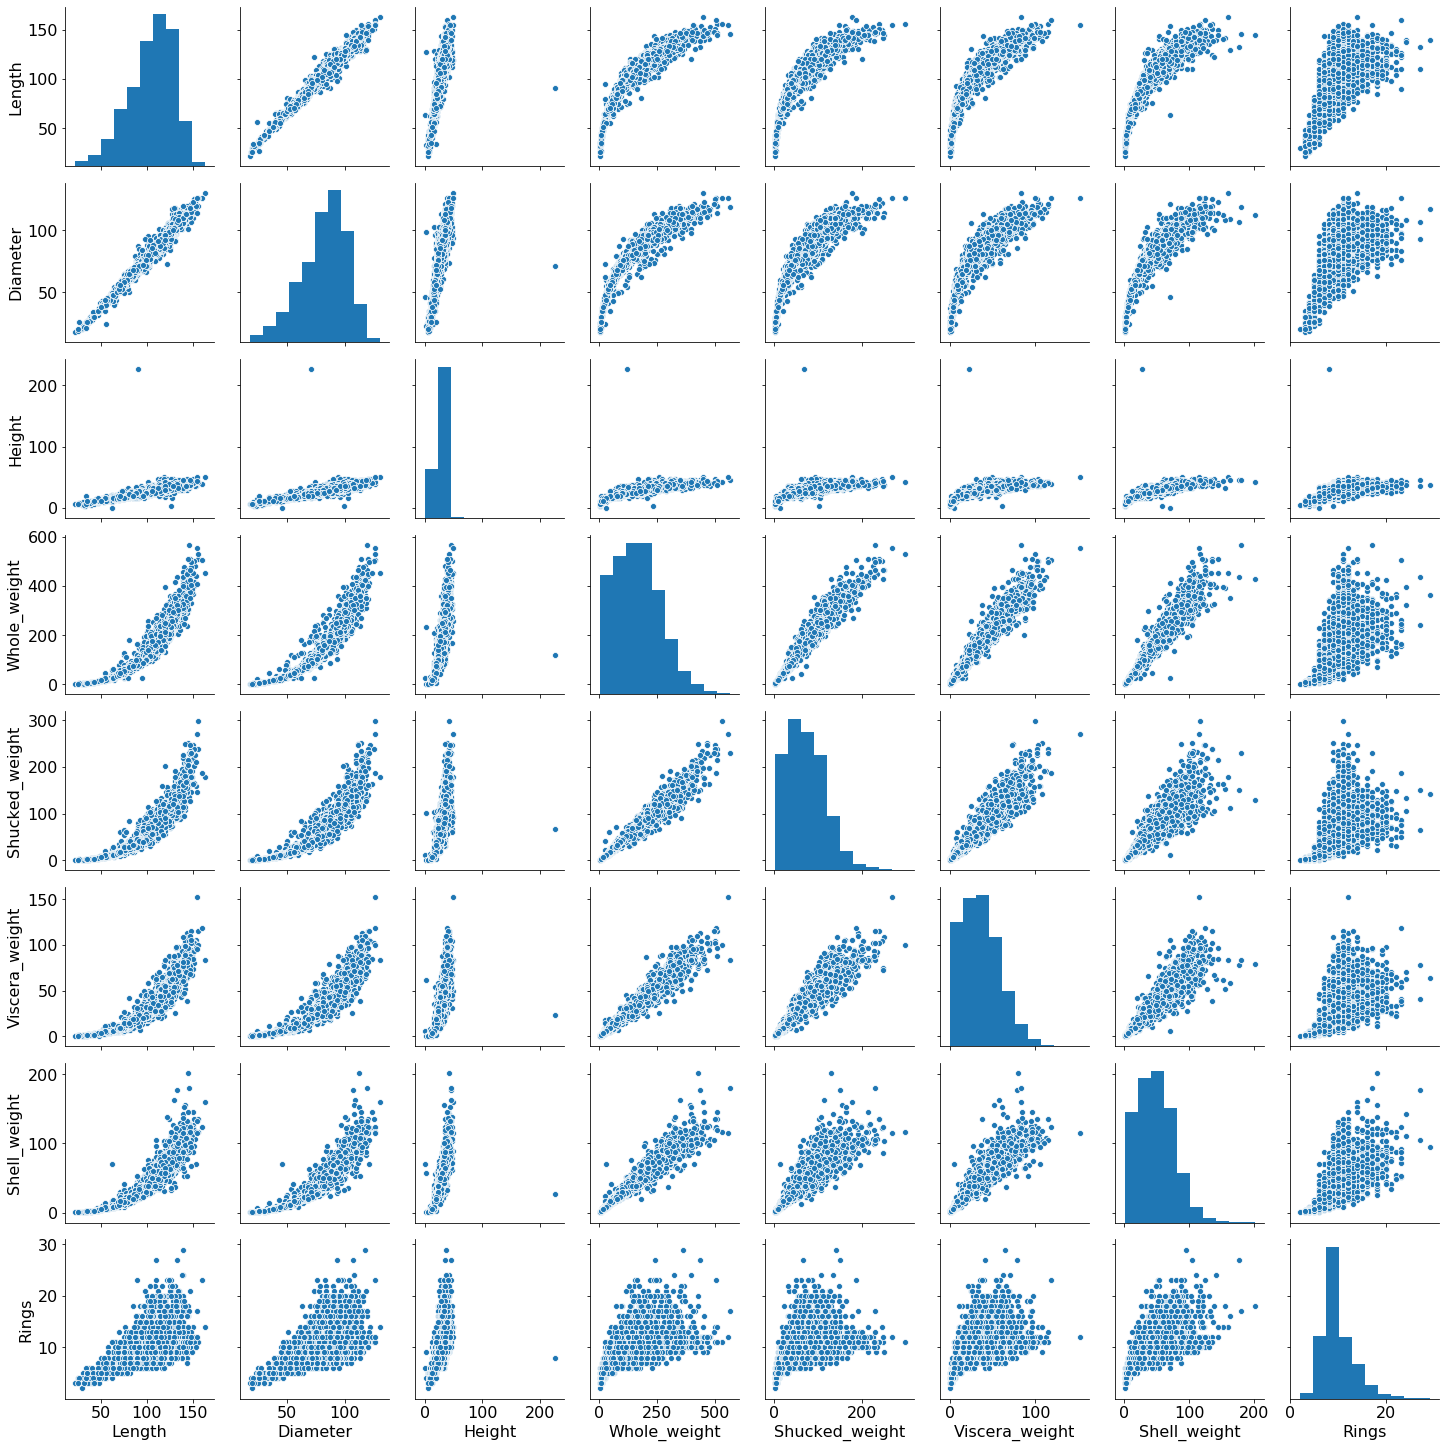

In [14]:
#Question 9

import seaborn as sns 

sns.pairplot(df_train.iloc[:, 0:8])
print("There seem to be an itersting trend between the variables Rings, Length and all height variables");

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     523.7
Date:                Sun, 08 Nov 2020   Prob (F-statistic):          2.94e-272
Time:                        11:59:35   Log-Likelihood:                -6965.3
No. Observations:                2923   AIC:                         1.394e+04
Df Residuals:                    2919   BIC:                         1.396e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8560      0.227     12.575      0.0

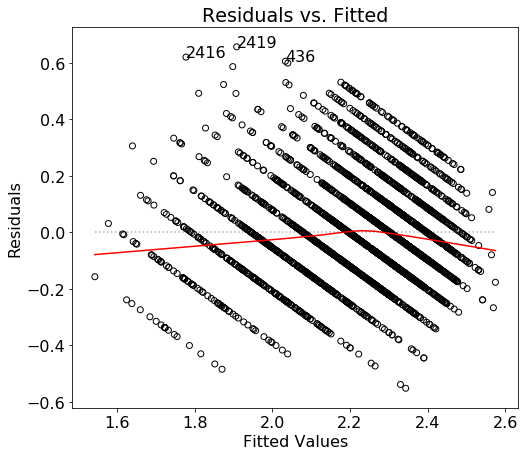

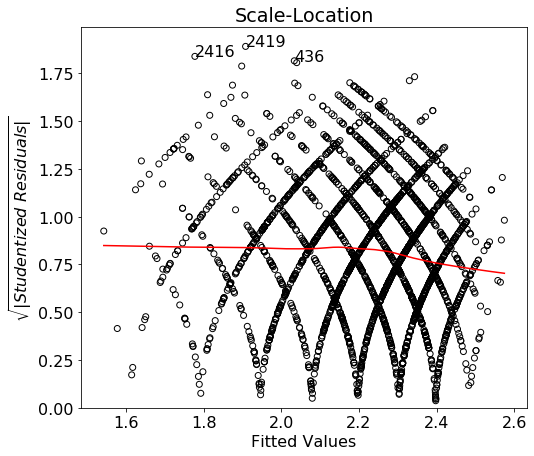

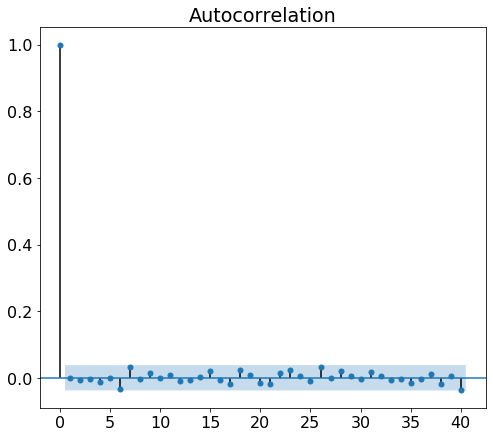

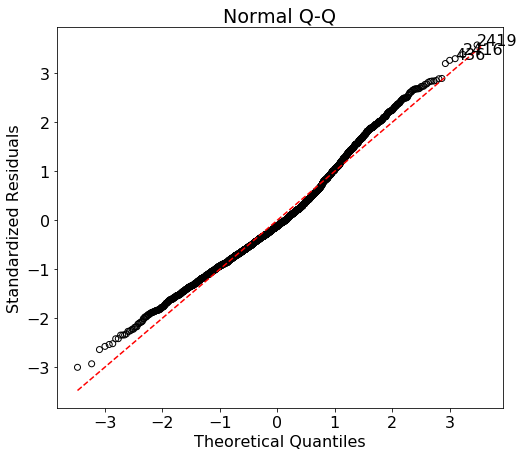

In [15]:
model = smf.ols(formula='Rings ~ Height + Length + Diameter', data=((df_train)))
results = model.fit()
print(results.summary())

df_train_3 = df_train.iloc[:, [0, 1, 2, 7]]

min_limit = df_train_3.quantile(0.25) - 1.5 * (df_train_3.quantile(0.75) - df_train_3.quantile(0.25))
max_limit = df_train_3.quantile(0.75) + 1.5 * (df_train_3.quantile(0.75) - df_train_3.quantile(0.25))

df_train_3 = df_train_3[(df_train_3.iloc[:, 0] > min_limit[0]) & (df_train_3.iloc[:, 0] < max_limit[0]) & (df_train_3.iloc[:, 1] > min_limit[1]) & (df_train_3.iloc[:, 1] < max_limit[1]) & (df_train_3.iloc[:, 2] > min_limit[2]) & (df_train_3.iloc[:, 2] < max_limit[2]) & (df_train_3.iloc[:, 3] > min_limit[3]) & (df_train_3.iloc[:, 3] < max_limit[3])]

model = smf.ols(formula='Rings ~ Height + Length + Diameter', data=((np.log(df_train_3))))
results = model.fit()
print(results.summary())

residuals = results.resid
fitted = results.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

student_residuals = results.get_influence().resid_studentized_internal
sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
sqrt_student_residuals.index = results.resid.index
smoothed = lowess(sqrt_student_residuals,fitted)
top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

fig, ax = plt.subplots()
ax.scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')
ax.set_ylim(0,max(sqrt_student_residuals)+0.1)
for i in top3.index:
    ax.annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
plt.show()

sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
sorted_student_residuals.index = results.resid.index
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

sm.graphics.tsa.plot_acf(residuals, lags=40)

fig, ax = plt.subplots()
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()

In [16]:
#Question 10

print("Except the intercept, all variables have a significant impact on the model")
print("\n")
print(results.summary())

Except the intercept, all variables have a significant impact on the model


                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     824.9
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:59:37   Log-Likelihood:                 736.19
No. Observations:                2679   AIC:                            -1464.
Df Residuals:                    2675   BIC:                            -1441.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [17]:
#Question 11

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(formula='Rings ~ Height + Length + Diameter', data=((np.log(df_train_3)))).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n")
print(anova_table)
print("\n")
print("All p-values are inferior to 0.05. Thus, a multiple linear model is better than a simple linear model")



             sum_sq      df           F        PR(>F)
Height     4.445129     1.0  131.340525  1.017858e-29
Length     0.704484     1.0   20.815424  5.285388e-06
Diameter   1.923425     1.0   56.831576  6.460835e-14
Residual  90.533526  2675.0         NaN           NaN


All p-values are inferior to 0.05. Thus, a multiple linear model is better than a simple linear model


In [32]:
#Question 12 

df_train_4 = df_train.iloc[:, [0, 1, 2, 7, 8, 9, 10]]

min_limit = df_train_4.quantile(0.25) - 1.5 * (df_train_4.quantile(0.75) - df_train_4.quantile(0.25))
max_limit = df_train_4.quantile(0.75) + 1.5 * (df_train_4.quantile(0.75) - df_train_4.quantile(0.25))

df_train_4 = df_train_4[(df_train_4.iloc[:, 0] > min_limit[0]) & (df_train_4.iloc[:, 0] < max_limit[0]) & (df_train_4.iloc[:, 1] > min_limit[1]) & (df_train_4.iloc[:, 1] < max_limit[1]) & (df_train_4.iloc[:, 2] > min_limit[2]) & (df_train_4.iloc[:, 2] < max_limit[2]) & (df_train_4.iloc[:, 3] > min_limit[3]) & (df_train_4.iloc[:, 3] < max_limit[3])]

model = smf.ols(formula = 'Rings~ Height + Length + Diameter + Sex_F + Sex_I + Sex_M', data = np.sqrt(df_train_4))
results = model.fit()
print(results.summary())

from pingouin import ancova

Test = ["Sex_F", "Sex_I", "Sex_M"]

print("\n")

for i in Test:
    print("\n")
    print(ancova(data = df_train_4, dv='Rings', covar=["Height", "Length", "Diameter"], between=i))


                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     455.7
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:21:23   Log-Likelihood:                -386.02
No. Observations:                2679   AIC:                             784.0
Df Residuals:                    2673   BIC:                             819.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0853      0.044     24.882      0.0

PART III. Model Selection and Prediction 

In [4]:
def perms(s):
    if(len(s)==1):
        return s
    res = ''
    
    for x in range(len(s)):
        res += s[x] + perms(s[0:x] + s[x+1:len(s)])

    return res + '\n'
    


In [5]:
perms("bonjour")

'bonjourru\nuorro\nrouuo\n\nojurru\nujrrj\nrjuuj\n\nujorro\nojrrj\nrjooj\n\nrjouuo\nojuuj\nujooj\n\n\njnourru\nuorro\nrouuo\n\nonurru\nunrrn\nrnuun\n\nunorro\nonrrn\nrnoon\n\nrnouuo\nonuun\nunoon\n\n\nonjurru\nujrrj\nrjuuj\n\njnurru\nunrrn\nrnuun\n\nunjrrj\njnrrn\nrnjjn\n\nrnjuuj\njnuun\nunjjn\n\n\nunjorro\nojrrj\nrjooj\n\njnorro\nonrrn\nrnoon\n\nonjrrj\njnrrn\nrnjjn\n\nrnjooj\njnoon\nonjjn\n\n\nrnjouuo\nojuuj\nujooj\n\njnouuo\nonuun\nunoon\n\nonjuuj\njnuun\nunjjn\n\nunjooj\njnoon\nonjjn\n\n\n\nnojourru\nuorro\nrouuo\n\nojurru\nujrrj\nrjuuj\n\nujorro\nojrrj\nrjooj\n\nrjouuo\nojuuj\nujooj\n\n\njoourru\nuorro\nrouuo\n\noourru\nuorro\nrouuo\n\nuoorro\noorro\nroooo\n\nroouuo\noouuo\nuoooo\n\n\noojurru\nujrrj\nrjuuj\n\njourru\nuorro\nrouuo\n\nuojrrj\njorro\nrojjo\n\nrojuuj\njouuo\nuojjo\n\n\nuojorro\nojrrj\nrjooj\n\njoorro\noorro\nroooo\n\noojrrj\njorro\nrojjo\n\nrojooj\njoooo\noojjo\n\n\nrojouuo\nojuuj\nujooj\n\njoouuo\noouuo\nuoooo\n\noojuuj\njouuo\nuojjo\n\nuojooj\njoooo\noojjo\n\n\n\njo

In [6]:
len(perms("bonjour"))

17319